In [1]:
import seaborn as sns
import mlflow
from tensorflow.keras import Sequential, layers
from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import model_to_dot
from IPython.display import SVG
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import os

2023-07-03 16:39:26.008679: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 16:39:26.057420: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-03 16:39:26.058685: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 16:39:27.091617: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
os.environ['MLFLOW_TRACKING_URI'] = '/root/code/mlflow'
mlflow.set_experiment("IRIS")
mlflow.start_run()

2023/07/03 16:39:28 INFO mlflow.tracking.fluent: Experiment with name 'IRIS' does not exist. Creating a new experiment.


<ActiveRun: >

In [3]:
df = sns.load_dataset("iris")

In [4]:
df2 = sns.load_dataset('titanic')

In [5]:
df2.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
468,0,3,male,NaN,0,0,7.7250,Q,Third,man,True,NaN,Queenstown,no,True
42,0,3,male,NaN,0,0,7.8958,C,Third,man,True,NaN,Cherbourg,no,True
490,0,3,male,NaN,1,0,19.9667,S,Third,man,True,NaN,Southampton,no,False
786,1,3,female,18.0,0,0,7.4958,S,Third,woman,False,NaN,Southampton,yes,True
97,1,1,male,23.0,0,1,63.3583,C,First,man,True,D,Cherbourg,yes,False


In [6]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
8,4.4,2.9,1.4,0.2,setosa
42,4.4,3.2,1.3,0.2,setosa
134,6.1,2.6,5.6,1.4,virginica
90,5.5,2.6,4.4,1.2,versicolor
57,4.9,2.4,3.3,1.0,versicolor


In [7]:
# sns.set_style("ticks")
# sns.set_palette("husl")
# sns.pairplot(df.iloc[:, 0:6], hue="species")

In [8]:
# features et target
# encoder
# split

X = df.drop(columns=["species"])
y = df["species"]

encoder = LabelEncoder()
y_encoder = encoder.fit_transform(y)
y_dummies = pd.get_dummies(y_encoder).values

X_train, X_test, y_train, y_test = train_test_split(X, y_dummies, test_size=0.2, random_state=42)

In [9]:
# modèle

model = Sequential()

model.add(layers.Dense(10, activation="relu", input_dim=4))
model.add(layers.Dense(3, activation="softmax"))

model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics = 'accuracy')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


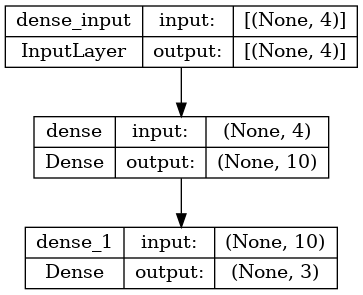

In [10]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [11]:
# entrainement du modèle

history = model.fit(X_train, y_train, batch_size=16, epochs=300)

Epoch 1/300


8/8 [==============================] - 1s 4ms/step - loss: 1.6104 - accuracy: 0.3417
Epoch 2/300
8/8 [==============================] - 0s 4ms/step - loss: 1.4635 - accuracy: 0.3417
Epoch 3/300
8/8 [==============================] - 0s 4ms/step - loss: 1.3260 - accuracy: 0.3417
Epoch 4/300
8/8 [==============================] - 0s 4ms/step - loss: 1.2016 - accuracy: 0.3417
Epoch 5/300
8/8 [==============================] - 0s 4ms/step - loss: 1.0798 - accuracy: 0.3417
Epoch 6/300
8/8 [==============================] - 0s 4ms/step - loss: 0.9795 - accuracy: 0.3417
Epoch 7/300
8/8 [==============================] - 0s 4ms/step - loss: 0.9018 - accuracy: 0.3417
Epoch 8/300
8/8 [==============================] - 0s 4ms/step - loss: 0.8399 - accuracy: 0.3417
Epoch 9/300
8/8 [==============================] - 0s 4ms/step - loss: 0.7888 - accuracy: 0.3417
Epoch 10/300
8/8 [==============================] - 0s 4ms/step - loss: 0.7538 - accuracy: 0.4417
Epoch 11/300
8/8 [=======================

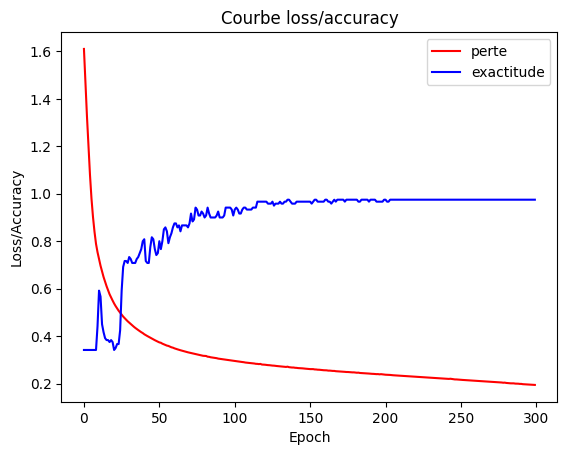

In [12]:
# plot loss et accuracy

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='perte', color='red')
plt.plot(history.history['accuracy'], label='exactitude', color='blue')
plt.title('Courbe loss/accuracy')
plt.ylabel('Loss/Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

for i, accuracy in enumerate(history.history['accuracy']):
    mlflow.log_metric('accuracy', accuracy, step=i)
    
for i, loss in enumerate(history.history['loss']):
    mlflow.log_metric('loss', loss, step=i)

mlflow.end_run()

In [13]:
# evaluate

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 157ms/step - loss: 0.1954 - accuracy: 0.9667


[0.19538262486457825, 0.9666666388511658]

In [14]:
# predict

y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

1/1 [==============================] - 0s 109ms/step


In [15]:
y_pred[:5], y_pred_class[:5]

(array([[2.1159444e-03, 8.5753310e-01, 1.4035089e-01],
        [9.9831551e-01, 1.6844422e-03, 3.2857521e-09],
        [2.5753671e-10, 7.4952003e-04, 9.9925053e-01],
        [4.5590550e-03, 7.5424397e-01, 2.4119696e-01],
        [1.4849078e-03, 8.5599887e-01, 1.4251612e-01]], dtype=float32),
 array([1, 0, 2, 1, 1]))

In [16]:
y_pred_class - y_test_class

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
# rapport de classification

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [18]:
# matrice de confusion

print(confusion_matrix(y_test_class, y_pred_class))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


<h3><strong>100% de bonne prédictions</strong><br><br><strong>10 prédictions correctes</strong> pour la classe 0,<br><strong>9 prédictions correctes</strong> pour la classe 1 <br><strong>11 prédictions correctes</strong> pour la classe 2. </h3>